# Mathematical analysis of the effect of a and b parameters


**Code:** #119-000

**File:** `apps/van_der_waals/parameters_analysis.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fparameters_analysis.ipynb)

-----------

The aim of this notebook is to visualize the effect of a and b parameters on van der Waals' isotherms.

## Interface

The main interface (``main_block_119_000``) is divided in two HBox: ``top_block_119_000`` and ``bottom_block_119_000``. ``top_block_119_000`` contains of 2 bqplot Figures: ``fig_119_001`` and ``fig_119_002``.  

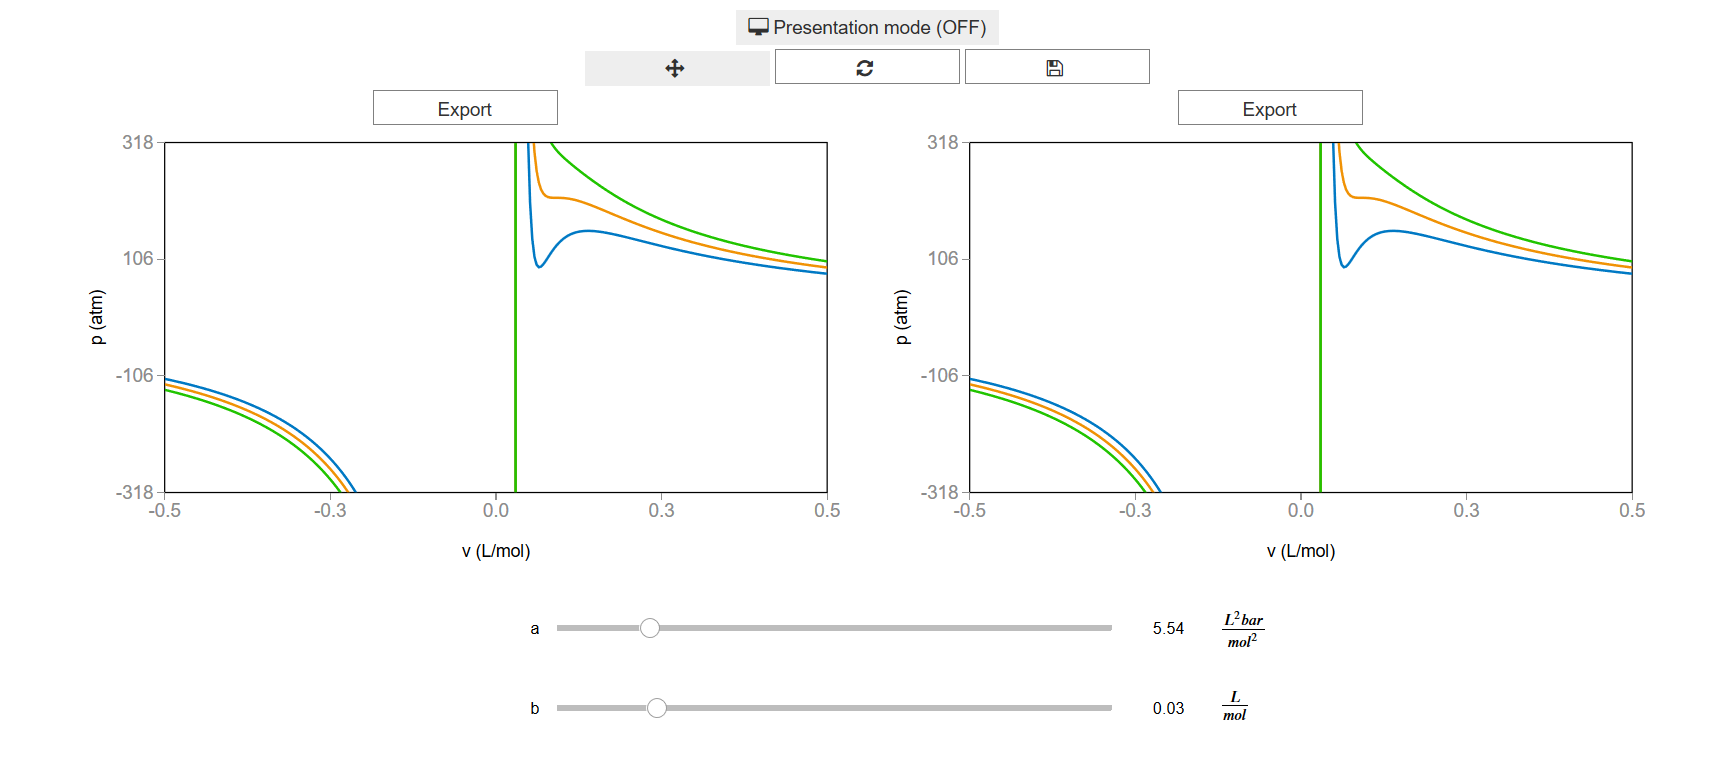

In [14]:
from IPython.display import Image
Image(filename='../../static/images/119-000_1.png')

The sliders ``a_slider`` and ``b_slider`` update the values of $a$ and $b$ which updates the isotherms of ``fig_119_001`` and ``fig_119_002``.

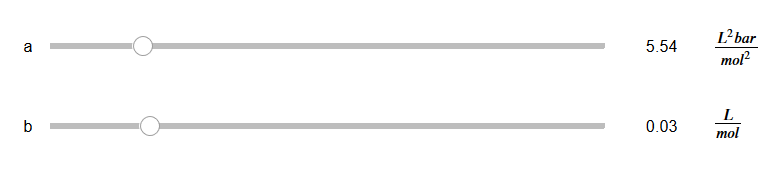

In [15]:
Image(filename='../../static/images/119-000_2.png')

## CSS
A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [1]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [2]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_absolute_isotherms`
- `calculate_critic`
- `bar_to_atm`

In [3]:
def get_absolute_isotherms(a, b, v_values, T_values):
    """This function calculates the theoretical p(v, T) plane 
        (in absolute coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        a: Term related with the attraction between particles in
           L^2 bar/mol^2.\n
        b: Term related with the volume that is occupied by one 
        mole of the molecules in L/mol.\n
        v_values: An array containing the values of v
        for which the isotherms must be calculated.\n
        T_values: An array containing the values of T for which
        the isotherms must be calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """
    isotherms = []

    R = 0.082 * 1.01325 #bar L mol^-1 K^-1

    for T in T_values:
        
        isot = []
        
        for v in v_values:
            
            p = R*T/(v - b) - (a/v**2)
            isot = np.append(isot, p)
            
        isotherms.append(isot)
        
    return isotherms

In [4]:
def calculate_critic(a, b):
    
    """
        This function calculates the critic point 
        (p_c, v_c, T_c) from given a and b parameters of 
        the Van der Waals equation of state for real gases.
        
        :math:`(P + a \\frac{n^2}{V^2})(V - nb) = nRT`
        
        :math:`p_c = \\frac{a}{27 b^2}`
        :math:`v_c = 3b`
        :math:`T_c = \\frac{8a}{27 b R}`
        
   Args:
       a: Term related with the attraction between particles in
       L^2 bar/mol^2.\n
       b: Term related with the volume that is occupied by one 
       mole of the molecules in L/mol.\n
       
   Returns:
       p_c: Critical pressure in bar.\n
       v_c: Critical volume in L/mol.\n
       T_c: Critical tenperature in K.\n
        
    """
    
    if b == 0.0:
        return None
    
    k_B = 1.3806488e-23 #m^2 kg s^-2 K^-1
    N_A = 6.02214129e23 
    R = 0.082 * 1.01325 #bar L mol^-1 K^-1
    
    p_c = a/27.0/(b**2)
    v_c = 3.0*b
    T_c = 8.0*a/27.0/b/R
    
    return p_c, v_c, T_c

In [5]:
def bar_to_atm(p_values):
    """This function changes the pressures of an array
    form bars to atm.
    
    Args:
        p_values: List consisted of pressures in bars.\n
        
    Returns:
        p_values: List consisted of pressures in atm.\n
    """
    
    p_values = np.array(p_values) * 0.9869 
        
    return p_values

## Functions related to interaction

In [6]:
def get_zoom_arrays(initial_x_range, final_x_range, initial_y_range, final_y_range, size):
    """This function calculates the arrays of the max/min values of
    x/y for some given limits.
    
    Args:
        initial_x_range: List consisted of initial values of x.\n
        final_x_range: List consisted of final values of x.\n
        initial_y_range: List consisted of initial values of y.\n
        final_y_range: List consisted of final values of y.\n
        
    Returns:
        x_min: Array consisted of minimun values of x.\n
        x_max: Array consisted of maximun values of x.\n
        y_min: Array consisted of minimun values of y.\n
        y_max: Array consisted of maximun values of y.\n
    """
        
    x_min = np.linspace(min(initial_x_range), min(final_x_range), size)
    x_max = np.linspace(max(initial_x_range), max(final_x_range), size)
    
    y_min = np.linspace(min(initial_y_range), min(final_y_range), size)
    y_max = np.linspace(max(initial_y_range), max(final_y_range), size)
    
    return x_min, x_max, y_min, y_max

In [7]:
def update_isotherms(change):
    """This function updates the isotherms of bqplot Figure
    'fig_119_002' when 'a_slider' of 'b_slider' are updated.
    """
    
    p_values = get_absolute_isotherms(
        a_slider.value,
        b_slider.value,
        v_values,
        T_values
    )
    
    p_values = bar_to_atm(p_values)
    
    marks = [
        bqm.Lines(
            x = [v_values for elem in p_values], 
            y = p_values, 
            scales = {'x': scale_x_119_001, 'y': scale_y_119_001}, 
            opacities = [1.0],
            visible = True,
            colors = colors,
        )
    ]
    
    fig_119_002.marks = marks

In [8]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [9]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_119_001_button:
        
        export_plot(fig_119_001)
        
    elif button is prepare_export_fig_119_002_button:
        
        export_plot(fig_119_002)

In [10]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [11]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
#In this program we are going to use water's parameters
a = 5.536 #L^2 bar mol^-2
b = 0.03049 #L mol^-1

colors = ['#0079c4','#f09205','#21c400', '#850082']

p_c, v_c, T_c = calculate_critic(a, b)

p_c = p_c * 0.9869 #unit change from bar to atm

v_values = np.linspace(-5, 5, 3000) #L/mol
T_values = [0.9*T_c, 1.0*T_c, 1.1*T_c]

p_values = get_absolute_isotherms(a, b, v_values, T_values)
p_values = bar_to_atm(p_values)

#####################
######TOP BLOCK######
#####################

top_block_119_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
    )
)

scale_x_119_001 = bqs.LinearScale(min = -0.5, max = 0.5)
scale_y_119_001 = bqs.LinearScale(min = -300, max = 300)

axis_x_119_001 = bqa.Axis(
    scale=scale_x_119_001,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_119_001 = bqa.Axis(
    scale=scale_y_119_001,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=4,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_119_001 = Figure(
    title='',
    marks=[],
    axes=[axis_x_119_001, axis_y_119_001],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=10, bottom=60, left=80, right=30),
    toolbar = True,
    layout=widgets.Layout(
        height='350px',
    )
)

marks = [
    bqm.Lines(
        x = [v_values for elem in p_values], 
        y = p_values, 
        scales = {'x': scale_x_119_001, 'y': scale_y_119_001}, 
        opacities = [1.0],
        visible = True,
        colors = colors,
    )
]

fig_119_001.marks = marks


tb_119_001 = Toolbar(figure=fig_119_001, layout=widgets.Layout(align_self='center'))

fig_119_002 = Figure(
    title='',
    marks=[],
    axes=[axis_x_119_001, axis_y_119_001],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=10, bottom=60, left=80, right=30),
    toolbar = True,
    layout=widgets.Layout(
        height='350px',
    )
)

fig_119_002.marks = marks

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

prepare_export_fig_119_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        align_self='center'
    )
)

prepare_export_fig_119_001_button.on_click(prepare_export)

prepare_export_fig_119_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        align_self='center'
    )
)

prepare_export_fig_119_002_button.on_click(prepare_export)

top_block_119_000.children = [
    change_view_button,
    tb_119_001,
    widgets.HBox([
        widgets.VBox([
            prepare_export_fig_119_001_button,
            fig_119_001
        ]),
        widgets.VBox([
            prepare_export_fig_119_002_button,
            fig_119_002
        ])
    ])
]

#####################
######BOTTOM BLOCK###
#####################

bottom_block_119_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        width='100%',
        margin='30px 0 0 0'
    )
)

a_slider = widgets.FloatSlider(
    min=0,
    max=34.0,
    step=0.001,
    value=a,
    description='a',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%'),
)

a_slider.observe(update_isotherms, 'value')

b_slider = widgets.FloatSlider(
    min=0,
    max=0.1735,
    step=0.0001,
    value=b,
    description='b',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%'),
)

b_slider.observe(update_isotherms, 'value')

bottom_block_119_000.children = [
    widgets.HBox([
        a_slider,
        widgets.HTMLMath(
            value=r"\( \frac{L^2 bar}{mol^2} \)",
            layout=widgets.Layout(height='60px')
        )],
        layout=widgets.Layout(
            width='50%',
            height='100%'
        )
    ),
    widgets.HBox([
        b_slider,
        widgets.HTMLMath(
            value=r"\( \frac{L}{mol} \)",
            layout=widgets.Layout(height='60px')
        )],
        layout=widgets.Layout(
            width='50%',
            height='100%'
        )
    )
]

#####################
####MAIN BLOCK#####
#####################

main_block_119_000 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

main_block_119_000.children = [
    top_block_119_000,
    bottom_block_119_000
]

figures = [
    fig_119_001,
    fig_119_002
]

main_block_119_000